Загружаем датасет

In [26]:
import kagglehub
import pandas as pd
import seaborn as sns

dataset_path = kagglehub.dataset_download("sameelie/resume-hh")
df = pd.read_csv(f'{dataset_path}/hh_ru.csv', sep=';')
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Предобработка

In [28]:
import re
import math
from pandas.api.types import is_numeric_dtype

# Делим колонку 'Пол, возраст' на две и переводим в числовые колонки 
# М - 1
# Ж - 0
if df.columns.__contains__('Пол, возраст'):
    sex_age_col = df['Пол, возраст'].values
    sex_col = []
    age_col = []
    for row in sex_age_col:
        sex = row.split(',')[0].strip()
        sex_col.append(int(sex.startswith('М')))
        age = re.findall('\d+', row.split(',')[1])[0]
        age_col.append(int(age))
    df['Пол'] = sex_col
    df['Возраст'] = age_col
    df = df.drop(columns=['Пол, возраст'])

# Превращаем колонку 'ЗП' в числовую
if not is_numeric_dtype(df['ЗП']):
    salary_col = df['ЗП'].values
    df['ЗП'] = [int(re.findall('\d+', val)[0]) for val in salary_col]

# Превращаем колонку 'Авто' в числовую
# Имеется собственный автомобиль -> 1
# Не указано -> 0
if not is_numeric_dtype(df['Авто']):
    is_car_exists_col = df['Авто'].values
    df['Авто'] = [int(val.strip().startswith('Имеется')) for val in is_car_exists_col]

# Разбиваем колонку 'Город, переезд, командировки' на три
if df.columns.__contains__('Город, переезд, командировки'):
    city_moving_trips_col = df['Город, переезд, командировки'].values
    city_col = []
    moving_col = []
    trip_col = []

    for row in city_moving_trips_col:
        city_col.append(row.split(',')[0].strip())
        moving_col.append(int(re.search(r'не готов(?:а)? к переезду', row) is None))
        trip_col.append(int(re.search(r'не готов(?:а)? к командировкам', row) is None))
    df['Город'] = city_col
    df['Переезд'] = moving_col
    df['Командировки'] = trip_col
    df = df.drop(columns=['Город, переезд, командировки'])

# Разбиваем колонку 'Занятость' на несколько: 'волонтерство', 'полная занятость', 
# 'проектная работа', 'стажировка', 'частичная занятость'
if df.columns.__contains__('Занятость'):
    work_type_col = df['Занятость'].values
    new_cols = {
        'Волонтерство': [],
        'Полная занятость': [],
        'Проектная работа': [],
        'Стажировка': []
    } # иначе 'Частичная занятость'

    for row in work_type_col:
        for col in new_cols.keys():
            is_col_exists = row.find(col.lower()) >= 0
            new_cols[col].append(int(is_col_exists))
    for col in new_cols:
        df[col] = new_cols[col]
    df = df.drop(columns=['Занятость'])

# Превращаем колонку 'Опыт работы' в числовую
if not is_numeric_dtype(df['Опыт работы']):
    work_experience_col = df['Опыт работы'].values
    work_experience_month_col = []

    # regex patterns
    year_pattern = r'Опыт работы (\d+) (?:год(?:а)?|лет).*'
    month_pattern = r'Опыт работы(?: \d+ (?:год(?:а)?|лет))? (\d+) месяц(?:а|ев)?.*'

    for row in work_experience_col:
        exp = 0
        if not(type(row).__name__ == 'float' and math.isnan(row)):
            matcher = re.compile(year_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # год
                exp += (int(match_val.group(1)) * 12)
            
            matcher = re.compile(month_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # месяц
                exp += int(match_val.group(1))
        work_experience_month_col.append(exp)
    df['Опыт работы'] = work_experience_month_col

In [29]:
import seaborn as sns

df.info()
df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  int64 
 1   Ищет работу на должность:        44744 non-null  object
 2   График                           44744 non-null  object
 3   Опыт работы                      44744 non-null  int64 
 4   Последнее/нынешнее место работы  44743 non-null  object
 5   Последняя/нынешняя должность     44742 non-null  object
 6   Образование и ВУЗ                44744 non-null  object
 7   Обновление резюме                44744 non-null  object
 8   Авто                             44744 non-null  int64 
 9   Пол                              44744 non-null  int64 
 10  Возраст                          44744 non-null  int64 
 11  Город                            44744 non-null  object
 12  Переезд                         

,ЗП,Опыт работы,Авто,Пол,Возраст,Переезд,Командировки,Волонтерство,Полная занятость,Проектная работа,Стажировка
ЗП,1.000000,0.136980,0.016760,0.063721,0.095651,0.066638,0.108153,0.003011,0.052140,0.018465,-0.059317
Опыт работы,0.136980,1.000000,0.123976,0.092198,0.836254,0.002003,0.138091,-0.021947,0.028373,0.014303,-0.124522
Авто,0.016760,0.123976,1.000000,0.136413,0.086801,0.029807,0.074009,-0.005535,0.019102,-0.008246,-0.035543
Пол,0.063721,0.092198,0.136413,1.000000,0.083434,0.091491,0.092599,0.020682,0.040847,0.043745,0.023647
Возраст,0.095651,0.836254,0.086801,0.083434,1.000000,-0.030002,0.085056,-0.017474,0.025402,0.012725,-0.118762
Переезд,0.066638,0.002003,0.029807,0.091491,-0.030002,1.000000,0.305249,0.054838,0.066090,0.122517,0.057267
Командировки,0.108153,0.138091,0.074009,0.092599,0.085056,0.305249,1.000000,0.022548,0.102423,0.076284,0.003336
Волонтерство,0.003011,-0.021947,-0.005535,0.020682,-0.017474,0.054838,0.022548,1.000000,-0.020804,0.195382,0.318977
Полная занятость,0.052140,0.028373,0.019102,0.040847,0.025402,0.066090,0.102423,-0.020804,1.000000,-0.157955,-0.063065
Проектная работа,0.018465,0.014303,-0.008246,0.043745,0.012725,0.122517,0.076284,0.195382,-0.157955,1.000000,0.271617


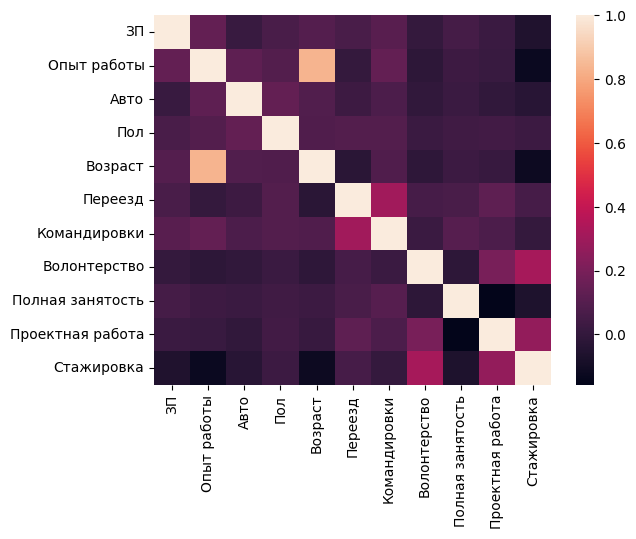

In [30]:
sns.heatmap(df.corr(numeric_only=True))

# Наибольшая зависимость
DEPENDENT_X = 'Опыт работы'
DEPENDENT_Y = 'Возраст'

Смотрим выбросы

<Axes: xlabel='Опыт работы', ylabel='Возраст'>

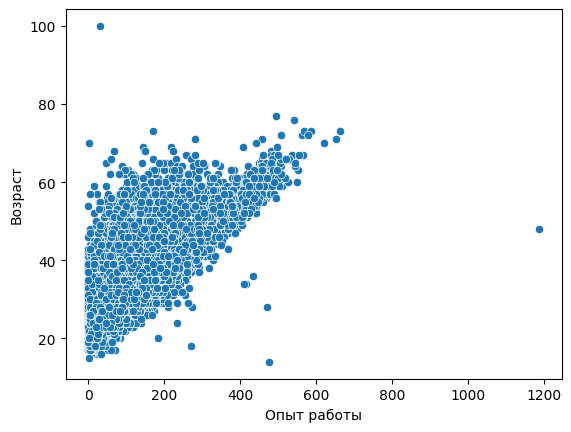

In [31]:
sns.scatterplot(x=DEPENDENT_X,y=DEPENDENT_Y,data=df)

Избавляемся от выбросов

In [32]:
df[df['Возраст'] < 18]

drop_idx = []
min_work_age = 14 # по ТК РФ
c = 0
for idx, row in df.iterrows():
    if row['Возраст'] < min_work_age:
        drop_idx.append(idx)
    elif row['Возраст'] == 14 and row['Опыт работы'] > 11:
        drop_idx.append(idx)
    elif (row['Возраст'] - min_work_age) * 12 < row['Опыт работы']:
        drop_idx.append(idx)
    elif row['Возраст'] > 80:
        drop_idx.append(idx)
df = df.drop(drop_idx)

<Axes: xlabel='Опыт работы', ylabel='Возраст'>

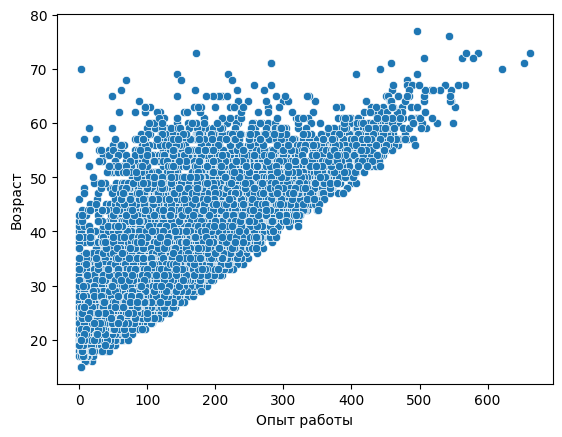

In [33]:
sns.scatterplot(x=DEPENDENT_X,y=DEPENDENT_Y,data=df)